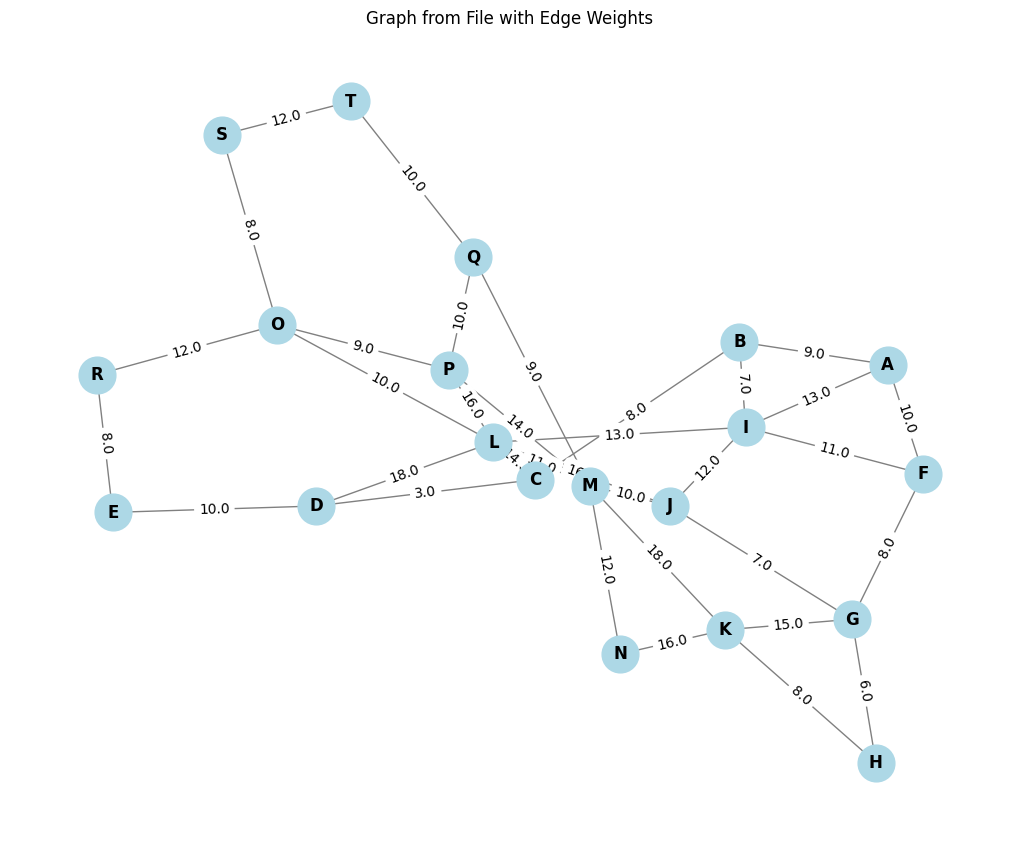

In [5]:
# Exibe o grafo do arquivo graph.txt
from functions import visualizar_grafo
visualizar_grafo("grafo.txt")

In [6]:
from functions import *
np.set_printoptions(threshold=np.inf)

# Utiliza ordem alfabetica para descoberta dos nós
def DFS_limitada(inicial, final, matriz_adj, limite=np.inf):
    # Obs.: Os nós descobertos não estão sendo revisitados por isso a profundidade 4 falha

    descobertos = []
    # Pilha de vertices a serem explorados
    pilha = []
    # Dicionaro com a profundidade de cada vertice
    profundidade = dict()
    pais = dict()
    
    # Descobre o vertice inicial e o adiciona na pilha para ser explorado
    descobertos.append(inicial-1)
    pilha.append(inicial-1)
    profundidade[inicial-1] = 0 # Profundidade de vertice inicial é zero

    if inicial > len(matriz_adj) or final > len(matriz_adj):
        print("Vertice inicial ou final não existe no grafo")
        return []
    while True:
        print("pilha: ", list(map(int_to_letter, incrementar(pilha))))
        # Obtem o primeiro item da pilha
        v = pilha.pop()
        print(int_to_letter(v+1))
        print(f"Profundidade de {int_to_letter(v+1)}: {profundidade[v]}")
        # Obtém os vizinhos do vertice v
        if profundidade[v] + 1 <= limite:
            vizinhos = [i for i in obter_vizinhos(v, matriz_adj) if i not in descobertos]
            print("vizinhos de ", int_to_letter(v+1), ":", list(map(int_to_letter, incrementar(vizinhos)))[::-1])
            for vizinho in vizinhos:
                # Descobre cada vizinho
                descobertos.append(vizinho)
                pais[vizinho] = v
                profundidade[vizinho] = profundidade[v] + 1
                if vizinho == final-1:
                    print("Produndidade da Solução: ", profundidade[final-1])
                    return incrementar(descobertos), incrementar(pais)
            # Adiciona a lista de vizinhos em ordem inversa na pilha
            pilha += vizinhos[::-1]
        if len(pilha) == 0:
            print("Sem solução!")
            return incrementar(descobertos), incrementar(pais)

matriz_adj = gerar_matriz_adjacente("grafo.txt")
inicial, final = letter_to_int("G"), letter_to_int("S") # Retorna o número correspondente a ordem alfabética

descobertos, pais = DFS_limitada(inicial, final, matriz_adj, limite=5)

imprimir_resultado(descobertos, usarLetras=True)

pilha:  ['G']
G
Profundidade de G: 0
vizinhos de  G : ['K', 'J', 'H', 'F']
pilha:  ['K', 'J', 'H', 'F']
F
Profundidade de F: 1
vizinhos de  F : ['I', 'A']
pilha:  ['K', 'J', 'H', 'I', 'A']
A
Profundidade de A: 2
vizinhos de  A : ['B']
pilha:  ['K', 'J', 'H', 'I', 'B']
B
Profundidade de B: 3
vizinhos de  B : ['C']
pilha:  ['K', 'J', 'H', 'I', 'C']
C
Profundidade de C: 4
pilha:  ['K', 'J', 'H', 'I']
I
Profundidade de I: 2
vizinhos de  I : ['L']
pilha:  ['K', 'J', 'H', 'L']
L
Profundidade de L: 3
vizinhos de  L : ['P', 'O', 'M', 'D']
pilha:  ['K', 'J', 'H', 'P', 'O', 'M', 'D']
D
Profundidade de D: 4
pilha:  ['K', 'J', 'H', 'P', 'O', 'M']
M
Profundidade de M: 4
pilha:  ['K', 'J', 'H', 'P', 'O']
O
Profundidade de O: 4
pilha:  ['K', 'J', 'H', 'P']
P
Profundidade de P: 4
pilha:  ['K', 'J', 'H']
H
Profundidade de H: 1
vizinhos de  H : []
pilha:  ['K', 'J']
J
Profundidade de J: 1
vizinhos de  J : []
pilha:  ['K']
K
Profundidade de K: 1
vizinhos de  K : ['N']
pilha:  ['N']
N
Profundidade de N: 2

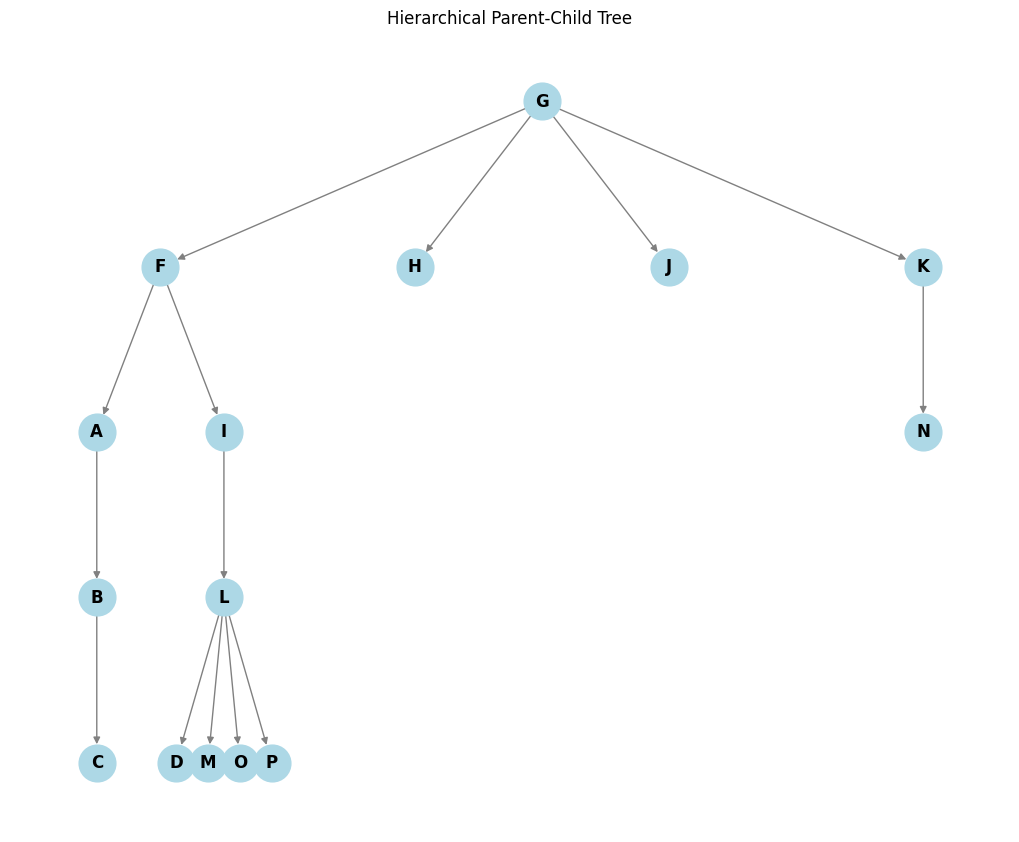

In [7]:
visualizar_arvore_de_pais(pais, usarLetras=True)